# **Wine Quality Classification Project**  
### **Supervised Learning – Binary Classification**  
#### **Predicting Wine Quality (High vs. Low)**  

## **Project Steps**  

### **1. Introduction & Problem Statement**  
- Define the objective: Classify wine as high or low quality.  
- Explain the dataset source, structure, and key variables.   

### **2. Data Loading & Preprocessing**  
- Load the white wine dataset from the UCI repository.  
- Convert wine quality scores into binary labels 
- Check for missing values, duplicate entries, and basic statistics.  

### **3. Exploratory Data Analysis (EDA)**  
- Visualize class distribution** to assess class imbalance.  
- Analyze feature distributions and correlations using histograms, boxplots, and heatmaps.  
- Identify potential outliers and feature importance trends.  


### **4. Model Selection, Training & Hyperparameter Tuning**  
- Train and fine-tune three supervised learning models:  
  - **Logistic Regression**
  - **Random Forest**  
  - **Support Vector Machine**    
- Perform hyperparameter tuning for each model  

### **5. Model Evaluation & Comparison**  
- Evaluate the models 
- Analyze feature importance for tree-based models 
- Visualize confusion matrices to assess classification trade-offs.  

### **6. Handling Class Imbalance**  
- Evaluate class distribution before and after resampling. 
- Apply SMOTE to balance classes.  
- Reassess class distribution and feature impacts.  
- Retrain and fine-tune the models on balanced data.
- Compare performance before and after applying SMOTE.

### **7. Discussion & Conclusion**  
- Interpret model results and trade-offs. 
- Highlight limitations, potential areas for improvement, and future work. 


## **References**  
- **UCI Wine Quality Dataset**: [UCI Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)  
- **Research Paper**: [Cortez et al., 2009](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377)  


# **Introduction: Binary Classification of White Wine Quality Using Supervised Learning**

Wine quality assessment represents a critical component in the **viticulture and enology industries**, significantly impacting both **consumer preferences and market performance**. Traditionally, wine evaluation has relied on **sensory analysis by human experts**—a method that, while valuable, introduces **inherent subjectivity and inconsistency** across evaluators. **Cortez et al. (2009)** pioneered research into using **data mining techniques** to predict wine quality based on **measurable physicochemical properties**, establishing a foundation for **more objective assessment frameworks** through **multi-class classification**.

This project builds upon that foundation while taking a **distinct approach** through **binary classification of white wines**, specifically differentiating between **high-quality and low-quality products**. This specialized focus addresses a **critical problem facing white wine producers**: how to **accurately assess wine quality** during the production process and **predict final quality before market release**. The ability to make these determinations **earlier in the production cycle** enables **timely interventions** and **more informed business decisions**.

The **practical applications** of this **binary classification model** are substantial for white wine producers. By **understanding the correlation** between **specific chemical properties** and **perceived quality**, producers can **implement targeted process adjustments** to enhance desirable characteristics. This **predictive capability** allows producers to **anticipate market reception, optimize pricing strategies**, and make **informed decisions** about **batch releases** or **potential refinements**.

This project applies **supervised learning algorithms** to analyze **physicochemical test data** from **white wines exclusively**—including **acidity levels, sugar content, alcohol concentration, and other measurable attributes**—to develop **binary classification models** that distinguish **high-quality wines** from **low-quality alternatives** with **high accuracy**. The **supervised learning approach** with **binary classification** offers several advantages for producers:

1. **Early quality prediction** during the winemaking process  
2. **Identification of specific chemical parameters** that most strongly influence quality outcomes  
3. **Opportunity for process interventions** before the wine reaches market  
4. **Reduction in reliance on time-consuming and subjective expert evaluations**  

By implementing **advanced machine learning techniques** with a **binary classification framework** focused specifically on **white wine**, this project **addresses a concrete business need** in the winemaking industry. The resulting model empowers producers with **data-driven insights** to improve **production processes, quality consistency, and market performance** of their **white wine offerings**.

### Load necessary packages

In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Model selection and evaluation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Utility
from collections import Counter
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


## About the Dataset

The dataset used in this project comes from the **UCI Machine Learning Repository** and originates from a study by Cortez et al. (2009). It contains physicochemical measurements of **white wines** from the **Vinho Verde** region of Portugal, along with corresponding quality ratings assigned by wine experts. The dataset includes **4,898 observations** and **11 numerical features**, such as **acidity levels, residual sugar, chlorides, sulfur dioxide content, density, pH, sulfates, and alcohol percentage**—all of which influence wine quality. The target variable, **quality**, is an integer score ranging from **0 to 10**, with most wines rated between 3 and 9. For this project, we convert these ratings into a **binary classification problem**, where wines with a score of **7 or higher** are labeled as **high quality (1)**, while those rated **6 or below** are considered **low quality (0).**

In [2]:
# Load the white wine dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

try:
    df = pd.read_csv(url, sep=";")
    print("Dataset successfully loaded!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display dataset shape (rows, columns)
print(f"\nDataset Shape: {df.shape}")

# Display column names
print(f"\nColumn Names: {list(df.columns)}")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values[missing_values > 0] if missing_values.sum() > 0 else "None")

# Display dataset info
print("\nDataset Info:")
df.info()

# Display first 5 rows
df.head()


Dataset successfully loaded!

Dataset Shape: (4898, 12)

Column Names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Missing Values Per Column:
 None

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             48

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Transform the original wine quality ratings (ranging from 0 to 10) into a binary classification target. Wines with a quality score of 7 or higher are labeled as high quality (1), while those 6 or below are labeled as low quality (0). The original quality column is then dropped, keeping only the new binary classification target, quality_binary. 
Then, to understand the distribution of high vs. low-quality wines, we look at the percentage of each class and visualizes it using a count plot, helping identify any potential class imbalance.


 Class Distribution (Binary Classification):

0    78.36 %
1    21.64 %
Name: quality_binary, dtype: object


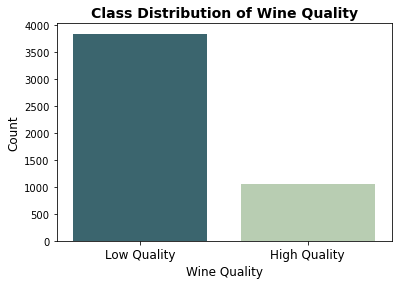

In [3]:
# Function to convert quality scores to binary classification
def classify_quality(score):
    """Convert wine quality score into binary labels (1 = High, 0 = Low)."""
    return 1 if score >= 7 else 0

# Apply function to create binary target variable
df["quality_binary"] = df["quality"].map(classify_quality)

# Drop the original quality column (since it's no longer needed)
df.drop(columns=["quality"], inplace=True)

# Check new class distribution
class_distribution = df["quality_binary"].value_counts(normalize=True) * 100
print("\n Class Distribution (Binary Classification):\n")
print(class_distribution.round(2).astype(str) + " %")

# Visualization: Class Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x=df["quality_binary"], palette=["#326b77", "#b5d1ae"]) 
# Rename X-axis labels
plt.xticks(ticks=[0, 1], labels=["Low Quality", "High Quality"], fontsize=12)

# Formatting
plt.xlabel("Wine Quality", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Class Distribution of Wine Quality", fontsize=14, fontweight="bold")

plt.show()


Now that we have our binary classification labels, let's analyze the features to understand their distributions and relationships with wine quality.

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [5]:
# Display enhanced summary statistics
summary_stats = df.describe().T  # Transpose for better readability

# Round numeric values for clarity
summary_stats = summary_stats.round(2)

# Display summary statistics with better formatting
print("\n Summary Statistics:\n")
print(summary_stats)



 Summary Statistics:

                       count    mean    std   min     25%     50%     75%  \
fixed acidity         4898.0    6.85   0.84  3.80    6.30    6.80    7.30   
volatile acidity      4898.0    0.28   0.10  0.08    0.21    0.26    0.32   
citric acid           4898.0    0.33   0.12  0.00    0.27    0.32    0.39   
residual sugar        4898.0    6.39   5.07  0.60    1.70    5.20    9.90   
chlorides             4898.0    0.05   0.02  0.01    0.04    0.04    0.05   
free sulfur dioxide   4898.0   35.31  17.01  2.00   23.00   34.00   46.00   
total sulfur dioxide  4898.0  138.36  42.50  9.00  108.00  134.00  167.00   
density               4898.0    0.99   0.00  0.99    0.99    0.99    1.00   
pH                    4898.0    3.19   0.15  2.72    3.09    3.18    3.28   
sulphates             4898.0    0.49   0.11  0.22    0.41    0.47    0.55   
alcohol               4898.0   10.51   1.23  8.00    9.50   10.40   11.40   
quality_binary        4898.0    0.22   0.41  0.00    

<Figure size 864x720 with 0 Axes>

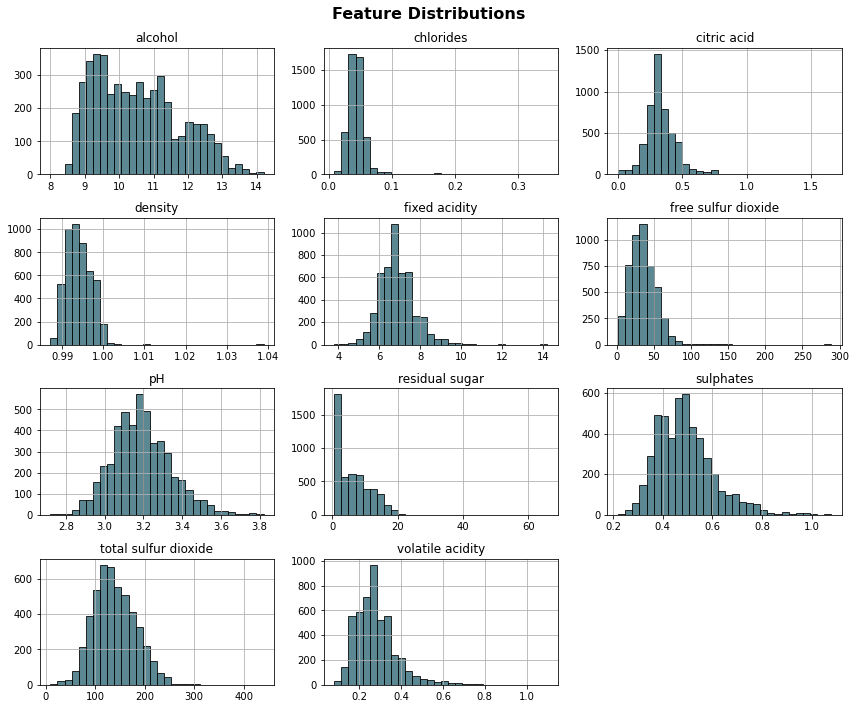

In [6]:
# Define color (using the teal-based sequential palette from earlier)
hist_color = "#326b77"  # Deep Teal

# Set up the histogram grid
plt.figure(figsize=(12, 10))
axes = df.drop(columns=["quality_binary"]).hist(
    bins=30, color=hist_color, edgecolor="black", alpha=0.8, layout=(4, 3), figsize=(12, 10)
)

# Improve layout and add main title
plt.suptitle("Feature Distributions", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title overlap

plt.show()


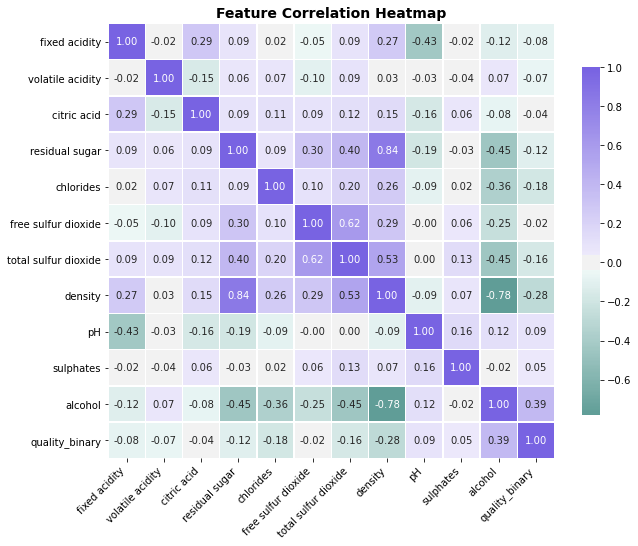

In [7]:
# Define a diverging teal color palette
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)  # Teal to soft purple

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, center=0, cbar_kws={'shrink': 0.8})

# Formatting
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.show()


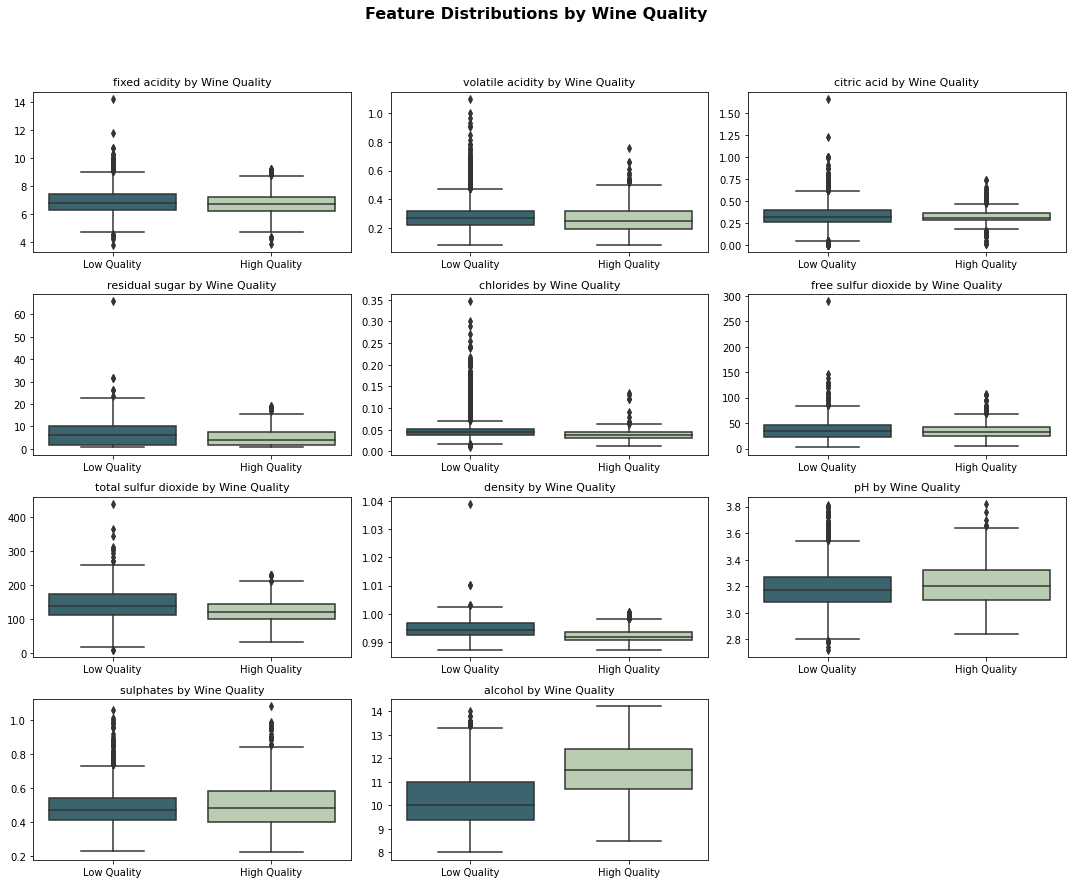

In [8]:
# Define custom teal-based sequential palette for Low & High quality wines
custom_palette = ["#326b77", "#b5d1ae"]  # Deep Teal & Light Teal

# Set up the plot grid for boxplots
plt.figure(figsize=(15, 12))

# Create boxplots for each feature, comparing low vs. high quality wines
for i, feature in enumerate(df.drop(columns=["quality_binary"]).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df["quality_binary"], y=df[feature], palette=custom_palette)
    
    # Formatting
    plt.xticks(ticks=[0, 1], labels=["Low Quality", "High Quality"], fontsize=10)
    plt.title(f"{feature} by Wine Quality", fontsize=11)  # Reduce subplot title size
    plt.xlabel("")  # Remove redundant x-axis labels
    plt.ylabel("")  # Remove redundant y-axis labels

# Adjust title positioning
plt.suptitle("Feature Distributions by Wine Quality", fontsize=16, fontweight="bold", y=1.02)

# Improve layout with more top margin
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust top margin to prevent overlap

plt.show()


In [9]:
df.groupby("quality_binary").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality_binary,,,,,,,,,,,
0,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215
1,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022


In [10]:
# Compute the mean values for each feature grouped by wine quality
quality_means = df.groupby("quality_binary").mean().T  # Transpose for better readability

# Compute the absolute difference between high and low quality wines
quality_means["Difference"] = abs(quality_means[1] - quality_means[0])

# Sort by the most impactful features (largest mean difference)
quality_means_sorted = quality_means.sort_values(by="Difference", ascending=False)

# Round for better readability
quality_means_sorted = quality_means_sorted.round(3)

# Display the refined table
print("\n Mean Feature Values by Wine Quality:\n")
print(quality_means_sorted)



 Mean Feature Values by Wine Quality:

quality_binary              0        1  Difference
total sulfur dioxide  141.983  125.245      16.738
residual sugar          6.703    5.262       1.442
alcohol                10.265   11.416       1.151
free sulfur dioxide    35.517   34.550       0.967
fixed acidity           6.891    6.725       0.165
pH                      3.181    3.215       0.034
volatile acidity        0.282    0.265       0.016
sulphates               0.487    0.500       0.013
citric acid             0.336    0.326       0.010
chlorides               0.048    0.038       0.010
density                 0.994    0.992       0.002


## Exploratory Data Analysis: Key Insights and Challenges

The **white wine dataset** consists of **4,898 observations** with **12 numerical features**, covering key physicochemical properties such as **acidity, residual sugar, sulfates, and alcohol content**. Notably, the dataset has **no missing values**, making it well-structured for analysis. The target variable, originally on a **0–10 scale**, has been converted into a **binary classification problem**, where wines rated **7 or higher** are considered **high quality**, and those **6 or below** are labeled as **low quality**.

A critical challenge in this dataset is **class imbalance**, with **78.36% of the wines classified as low quality** and only **22.64% as high quality**. This imbalance means that a model trained on raw data may be biased toward predicting low-quality wines more frequently. Addressing this issue will require **oversampling techniques like SMOTE** to balance the dataset and improve the ability to correctly classify high-quality wines.

Feature distribution analysis reveals that some variables, such as **residual sugar, free sulfur dioxide, and total sulfur dioxide**, are **right-skewed**, indicating the presence of extreme values. On the other hand, **alcohol content, density, and pH** follow a more **normal distribution**, making them potentially more stable predictors of wine quality. Given these characteristics, **scaling and normalization** will be necessary to ensure that features with different ranges do not disproportionately influence certain models, especially **SVM and Logistic Regression**.

The **correlation heatmap** highlights key relationships among features. **Density is strongly correlated with residual sugar**, reinforcing that sugar content significantly contributes to a wine’s overall weight. **Alcohol content negatively correlates with density**, which aligns with expectations since alcohol is less dense than water. Meanwhile, **total sulfur dioxide and free sulfur dioxide are moderately correlated**, indicating that sulfur compounds interact but contribute differently to wine preservation. Interestingly, **fixed acidity and citric acid show weak correlations with wine quality**, suggesting they may not be strong differentiators between high- and low-quality wines.

Examining the **mean feature values across quality levels**, alcohol emerges as a **key differentiator**, with **high-quality wines having a higher average alcohol content (11.42%)** compared to low-quality wines (10.26%). Similarly, **total sulfur dioxide levels tend to be lower in high-quality wines**, suggesting that excessive sulfite usage could negatively impact wine perception. **Residual sugar levels are also slightly lower in high-quality wines**, indicating that wines with excessive sweetness may not be rated as highly.


## **Preprocessing and Model Training**  

Before training our models, we preprocess the dataset to ensure optimal performance. This includes **scaling numerical features** and splitting the data into **training and testing sets**. Given the binary classification nature of the task, we experiment with three supervised learning models:  
- **Logistic Regression** as a baseline model due to its simplicity and interpretability.  
- **Random Forest**, an ensemble method that captures non-linear relationships and ranks feature importance.  
- **Support Vector Machine (SVM)** with an RBF kernel, which helps identify complex decision boundaries.  

We apply **Stratified K-Fold Cross-Validation** to evaluate model performance reliably and fine-tune hyperparameters using **RandomizedSearchCV**. These steps ensure that our models generalize well and effectively differentiate between high- and low-quality wines.

In [11]:
# Select numeric feature columns (excluding target)
feature_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("quality_binary")

# Choose scaling method
use_robust_scaler = True  # Set to False to use StandardScaler
scaler = RobustScaler() if use_robust_scaler else StandardScaler()

print(f"Using {'RobustScaler' if use_robust_scaler else 'StandardScaler'} for feature scaling.")

# Apply scaling directly to df (instead of df_scaled)
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Verify scaling with first few rows
df.head()


Using RobustScaler for feature scaling.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,0.2,0.090909,0.333333,1.890244,0.142857,0.478261,0.610169,1.658481,-0.947368,-0.142857,-0.842105,0
1,-0.5,0.363636,0.166667,-0.439024,0.428571,-0.869565,-0.033898,0.059395,0.631579,0.142857,-0.473684,0
2,1.3,0.181818,0.666667,0.207317,0.500000,-0.173913,-0.627119,0.310680,0.421053,-0.214286,-0.157895,0
3,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.424900,0.052632,-0.500000,-0.263158,0
4,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.424900,0.052632,-0.500000,-0.263158,0


Use k-Fold Cross-Validation when:

You want a more reliable performance estimate.
You need to ensure that performance isn’t dependent on a single split.
Since we are testing multiple models, we should use k-fold cross-validation (e.g., 5-fold CV) to get a more reliable evaluation.

In [12]:
# Define features and target variable
X = df.drop(columns=["quality_binary"])  # Feature matrix (all columns except target)
y = df["quality_binary"]  # Target variable (wine quality: 0 = Low, 1 = High)

# Initialize stratified k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Stratified K-Fold Cross-Validation initialized with 5 splits.")


Stratified K-Fold Cross-Validation initialized with 5 splits.


## Logistic Regression

In [14]:
# Define hyperparameter search space
param_dist = {
    "C": np.logspace(-3, 2, 10),  # Log-scale range for better regularization tuning
    "penalty": ["l2"],  # L2 regularization only (more stable)
    "solver": ["saga"]  # Optimized for large datasets
}

# Initialize logistic regression with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=500, class_weight="balanced")

# Set cross-validation strategy
cv_splits = 5
random_search = RandomizedSearchCV(
    log_reg, param_distributions=param_dist, 
    n_iter=10, cv=cv_splits, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X, y)

# Extract best model and results
best_logreg = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print results
print(f"\nBest Logistic Regression Parameters: {best_params}")
print(f"Best Logistic Regression Accuracy: {best_score:.4f}")



Best Logistic Regression Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 100.0}
Best Logistic Regression Accuracy: 0.7080



Logistic Regression Cross-Validation Results:
Accuracy: 0.7115
F1-Score: 0.5326

Classification Report:
               precision    recall  f1-score   support

           0     0.9131    0.6983    0.7914      3838
           1     0.4101    0.7594    0.5326      1060

    accuracy                         0.7115      4898
   macro avg     0.6616    0.7289    0.6620      4898
weighted avg     0.8043    0.7115    0.7354      4898



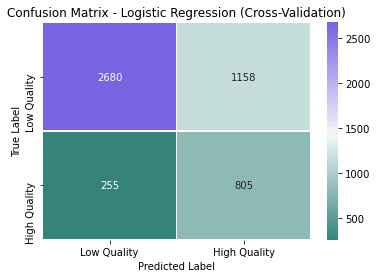

In [15]:
# Get the best logistic regression model
best_log_reg = random_search.best_estimator_

# Perform cross-validation predictions using kfold
y_pred_cv = cross_val_predict(best_log_reg, X, y, cv=kfold)

# Compute evaluation metrics
accuracy = accuracy_score(y, y_pred_cv)
f1 = f1_score(y, y_pred_cv)
class_report = classification_report(y, y_pred_cv, digits=4)
conf_matrix = confusion_matrix(y, y_pred_cv)

# Print results
print(f"\nLogistic Regression Cross-Validation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", class_report)

# Define a diverging palette (teal-based) similar to the earlier heatmap
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix using the diverging palette
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Cross-Validation)")
plt.show()


The **logistic regression model** achieved an **accuracy of 71.15%**, reflecting a trade-off between **precision and recall**. While the model performs well in identifying **low-quality wines** (**91.31% precision, 69.83% recall**), it struggles with **high-quality wines**, achieving **41.01% precision and 75.94% recall**.

This means that **75.94% of actual high-quality wines were correctly classified**, but the **low precision (41.01%)** suggests that many wines predicted as high-quality were actually low-quality (**high false positive rate**). On the other hand, while the model has **strong precision for low-quality wines (91.31%)**, its recall of **69.83%** means that nearly **30% of actual low-quality wines were misclassified as high-quality**.

The results highlight a **persistent class imbalance issue**, where the model’s decision boundary favors the **majority class (low-quality wines)**. This imbalance leads to more **false positives for high-quality wines**, reducing precision, and **false negatives for low-quality wines**, reducing recall.

To improve classification performance, **alternative resampling strategies like SMOTE**, **adjusting class weights**, or **exploring non-linear models like Random Forest or SVM** could be beneficial. These approaches may help better separate the two classes and reduce the impact of imbalance on the model’s predictions.


## Random Forest

In [16]:
# Define hyperparameter grid
param_dist = {
    "n_estimators": [100, 300, 500],  # Number of trees (increased upper range)
    "max_depth": [10, 20, 30, None],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "class_weight": ["balanced", None]  # Handling class imbalance
}

# Initialize Random Forest with class weighting
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV using kfold
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=10, cv=kfold, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model
random_search_rf.fit(X, y)

# Extract best model and results
best_rf = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
best_rf_score = random_search_rf.best_score_

# Print results
print(f"\nBest Random Forest Parameters: {best_rf_params}")
print(f"Best Random Forest Accuracy: {best_rf_score:.4f}")



Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 20, 'class_weight': None}
Best Random Forest Accuracy: 0.8814


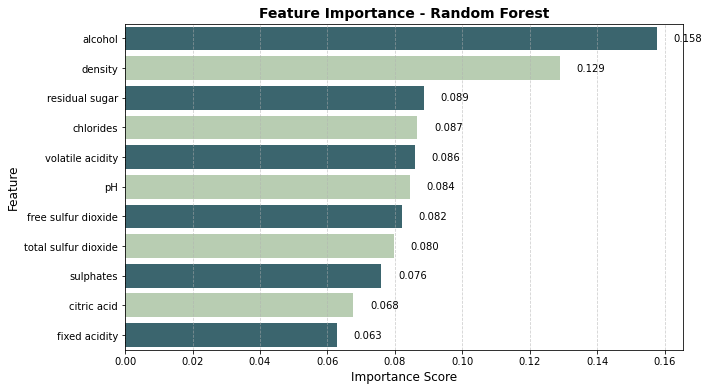

In [17]:
# Get best Random Forest model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Extract feature importances and sort them
feature_importance = best_rf.feature_importances_
features = np.array(X.columns)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Define custom teal color palette
custom_palette = sns.color_palette(["#326b77", "#b5d1ae"], n_colors=len(features))

# Create feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette=custom_palette)

# Add labels to bars
for index, value in enumerate(sorted_importance):
    plt.text(value + 0.005, index, f"{value:.3f}", va="center", fontsize=10)

# Formatting
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance - Random Forest", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


 Random Forest Cross-Validation Results:
 Accuracy: 0.8814
 F1-Score: 0.6799

 Classification Report:
               precision    recall  f1-score   support

           0     0.8931    0.9640    0.9272      3838
           1     0.8172    0.5821    0.6799      1060

    accuracy                         0.8814      4898
   macro avg     0.8551    0.7731    0.8035      4898
weighted avg     0.8767    0.8814    0.8737      4898



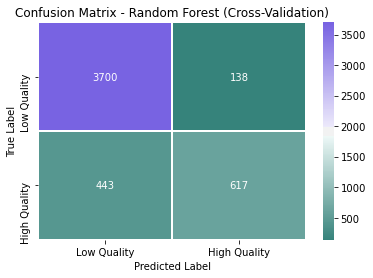

In [18]:
# Get the best Random Forest model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Perform cross-validation predictions using kfold
y_pred_cv = cross_val_predict(best_rf, X, y, cv=kfold)

# Compute evaluation metrics
accuracy = accuracy_score(y, y_pred_cv)
f1 = f1_score(y, y_pred_cv)
class_report = classification_report(y, y_pred_cv, digits=4)
conf_matrix = confusion_matrix(y, y_pred_cv)

# Print results
print(f"\n Random Forest Cross-Validation Results:")
print(f" Accuracy: {accuracy:.4f}")
print(f" F1-Score: {f1:.4f}")
print("\n Classification Report:\n", class_report)

# Define a diverging teal-based palette (same as used in previous heatmaps)
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Cross-Validation)")
plt.show()


The **Random Forest feature importance analysis** confirms that **alcohol content** is the most influential predictor of white wine quality, reinforcing the trend that higher-alcohol wines are typically rated as higher quality. **Density** is also highly important, likely reflecting interactions between **sugar content, alcohol levels, and overall wine perception**. Other significant predictors include **residual sugar, chlorides, and volatile acidity**, all of which influence the balance of sweetness, acidity, and stability in wine. In contrast, **fixed acidity and citric acid** appear to have the least influence, suggesting they play a minimal role in differentiating high- and low-quality wines.

Despite these insights, the **Random Forest model still faces challenges in identifying high-quality wines**. While it achieves a **strong overall accuracy of 88.14%**, its performance is significantly better for **low-quality wines (96.40% recall, 89.31% precision)** than for **high-quality wines (58.21% recall, 81.72% precision)**. This indicates that although the model successfully identifies most low-quality wines, it **fails to correctly classify over 40% of high-quality wines**, leading to an imbalance in classification performance.

To improve these results, potential next steps could include **feature selection to remove less impactful variables**, **testing XGBoost or LightGBM** to better capture complex feature interactions, or **applying class balancing techniques such as SMOTE** to enhance recall for high-quality wines. These approaches may help the model better differentiate between high- and low-quality wines and improve overall classification balance.

## SVM

In [19]:
# Define an enhanced hyperparameter search grid for SVM
param_dist = {
    "C": np.logspace(-2, 2, 5),  # Expands regularization range for better tuning
    "gamma": np.logspace(-2, 2, 5),  # More granular gamma values for fine-tuning
    "kernel": ["rbf"],  # Exploring non-linear kernels
}

# Initialize SVM model
svm = SVC()

# Perform Randomized Search using kfold
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist, 
    n_iter=10, cv=kfold, scoring="precision", n_jobs=-1, random_state=42
)

# Fit the model
random_search_svm.fit(X, y)

# Extract best model and results
best_svm = random_search_svm.best_estimator_
best_svm_params = random_search_svm.best_params_
best_svm_score = random_search_svm.best_score_

# Print results
print(f"\n Best SVM Parameters: {best_svm_params}")
print(f"Best SVM Precision Score: {best_svm_score:.4f}")



 Best SVM Parameters: {'kernel': 'rbf', 'gamma': 10.0, 'C': 100.0}
Best SVM Precision Score: 0.9951



 SVM Cross-Validation Results:
 Accuracy: 0.8612
 F1-Score: 0.5291

 Classification Report:
               precision    recall  f1-score   support

           0     0.8498    0.9995    0.9186      3838
           1     0.9948    0.3604    0.5291      1060

    accuracy                         0.8612      4898
   macro avg     0.9223    0.6799    0.7238      4898
weighted avg     0.8812    0.8612    0.8343      4898



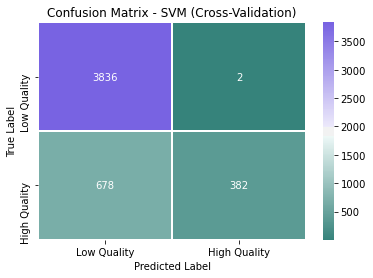

In [20]:
# Get the best SVM model from RandomizedSearchCV
best_svm = random_search_svm.best_estimator_

# Perform cross-validation predictions using kfold
y_pred_svm = cross_val_predict(best_svm, X, y, cv=kfold)

# Compute evaluation metrics
svm_accuracy = accuracy_score(y, y_pred_svm)
svm_f1 = f1_score(y, y_pred_svm)
svm_class_report = classification_report(y, y_pred_svm, digits=4)
svm_conf_matrix = confusion_matrix(y, y_pred_svm)

# Print results
print(f"\n SVM Cross-Validation Results:")
print(f" Accuracy: {svm_accuracy:.4f}")
print(f" F1-Score: {svm_f1:.4f}")
print("\n Classification Report:\n", svm_class_report)

# Define a diverging teal-based palette (same as used in previous heatmaps)
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (Cross-Validation)")
plt.show()

The **SVM model trained on white wines** achieved an **accuracy of 86.12%**, suggesting strong overall performance. However, a closer look at the classification metrics reveals **significant challenges in identifying high-quality wines**. The model excels in identifying **low-quality wines**, achieving **99.95% recall and 84.98% precision**, meaning it correctly classifies nearly all low-quality wines while keeping false positives minimal.

In contrast, its performance on **high-quality wines is much weaker**, with **only 36.04% recall and an F1-score of 52.91%**. This means that while the model correctly labels some high-quality wines, it **misclassifies nearly 64% of them as low quality**. The model’s **high precision (99.48%) for high-quality wines** suggests that when it does predict a wine as high-quality, it is usually correct, but it is overly conservative, favoring low-quality classifications. This imbalance highlights a common issue in SVM models—without sufficient handling of class imbalance, the decision boundary skews toward the majority class, leading to **high false negatives for the minority class**.

To improve the classification of high-quality wines, possible next steps include **adjusting class weights, fine-tuning hyperparameters (e.g., exploring different kernels), or applying SMOTE to rebalance the dataset**. Additionally, considering a **tree-based model such as XGBoost or LightGBM** could help capture more complex decision boundaries that better separate high- and low-quality wines.

### Summary

In [21]:
import pandas as pd

# Updated model performance metrics based on the new summaries
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [0.7115, 0.8814, 0.8612],
    "Precision (Low)": [0.9131, 0.8931, 0.8498],
    "Recall (Low)": [0.6983, 0.9640, 0.9995],
    "F1 (Low)": [0.7914, 0.9272, 0.9186],
    "Precision (High)": [0.4101, 0.8172, 0.9948],
    "Recall (High)": [0.7594, 0.5821, 0.3604],
    "F1 (High)": [0.5326, 0.6799, 0.5291]
}

# Convert to DataFrame
summary_df = pd.DataFrame(model_results)

# Round values for better readability
summary_df.iloc[:, 1:] = summary_df.iloc[:, 1:].round(4)


# Display the summary table
summary_df


,Model,Accuracy,Precision (Low),Recall (Low),F1 (Low),Precision (High),Recall (High),F1 (High)
0,Logistic Regression,0.7115,0.9131,0.6983,0.7914,0.4101,0.7594,0.5326
1,Random Forest,0.8814,0.8931,0.9640,0.9272,0.8172,0.5821,0.6799
2,SVM,0.8612,0.8498,0.9995,0.9186,0.9948,0.3604,0.5291


### **Key Takeaways from Model Performance**  

1. **Random Forest is the Best Overall Performer**  
   - Among the three models, **Random Forest achieves the highest accuracy (88.14%)**, making it the most effective at classifying both high- and low-quality wines.
   - It provides a **better balance between precision and recall** for high-quality wines (**81.72% precision, 58.21% recall**) compared to Logistic Regression and SVM.
   - The model still struggles with **misclassifying high-quality wines (41.79% false negatives)**, but it significantly outperforms the other two models in this regard.

2. **SVM Overwhelmingly Favors Low-Quality Wines**  
   - **SVM achieves high accuracy (86.12%)**, but a closer look at recall metrics reveals an extreme **bias toward low-quality wines**.
   - The model classifies **nearly all low-quality wines correctly (99.95% recall)**, but **only 36.04% of high-quality wines** are identified, meaning **almost two-thirds of high-quality wines are misclassified as low-quality**.
   - The **very high precision for high-quality wines (99.48%)** suggests that when the model does predict a wine as high quality, it is almost always correct—but it rarely makes such predictions, leading to **high false negatives**.

3. **Logistic Regression is the Weakest Model**  
   - Logistic Regression performs **significantly worse than Random Forest and SVM** in terms of accuracy (**71.15%**), indicating it is less capable of handling complex decision boundaries.
   - While it has **decent recall for high-quality wines (75.94%)**, its **poor precision (41.01%)** leads to a high false positive rate, meaning it **mislabels many low-quality wines as high quality**.
   - The imbalance in predictions makes it a **less reliable classifier** compared to the more advanced models.


## Addressing Class Imbalance with SMOTE

In our wine quality classification task, we observed that **high-quality wines** are significantly underrepresented compared to **low-quality wines**. This class imbalance led to **biased model performance**, where all three models—**Logistic Regression, Random Forest, and SVM**—excelled at identifying low-quality wines but struggled with high-quality wines. **SVM, in particular, had extremely high recall for low-quality wines (99.95%) but only identified 36.04% of high-quality wines correctly**, highlighting the model's tendency to favor the majority class. **Random Forest performed better than the other models, achieving a recall of 58.21% for high-quality wines**, but still misclassified over 40% of them.

To address this issue, we apply **Synthetic Minority Over-sampling Technique (SMOTE)**, which generates synthetic examples of the minority class rather than simply duplicating existing data. This technique creates a **more balanced dataset**, helping the models learn distinguishing patterns in high-quality wines rather than being biased toward low-quality ones. By implementing SMOTE, we aim to **improve recall for high-quality wines while maintaining overall model performance**, ensuring that our classifier is more effective in real-world applications where class imbalance is a common challenge.

In [26]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
new_class_distribution = Counter(y_resampled)


# Define features and target using the SMOTE-balanced dataset
X = X_resampled  # Features from the resampled dataset
y = y_resampled  # Target variable from the resampled dataset

# Display the new class distribution after SMOTE
new_class_distribution

Counter({0: 3838, 1: 3838})

## Retrain the models

### Logistic regression

In [27]:
# Define hyperparameter search space
param_dist = {
    "C": np.logspace(-3, 2, 10),  # Log-scale range for better regularization tuning
    "penalty": ["l2"],  # L2 regularization only (more stable)
    "solver": ["saga"]  # Optimized for large datasets
}

# Initialize logistic regression with best settings
log_reg = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)

# Set stratified k-fold cross-validation
cv_splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Randomized Search with SMOTE data
random_search = RandomizedSearchCV(
    log_reg, param_distributions=param_dist, 
    n_iter=10, cv=cv_splits, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model on SMOTE-resampled dataset
random_search.fit(X, y)

# Extract best model and results
best_logreg = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print results
print(f"\n Best Logistic Regression Parameters: {best_params}")
print(f" Best Logistic Regression Accuracy (SMOTE): {best_score:.4f}")



📊 Best Logistic Regression Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01291549665014884}
✔️ Best Logistic Regression Accuracy (SMOTE): 0.7383



📊 Logistic Regression Cross-Validation Results (SMOTE):
✔️ Accuracy: 0.7383
✔️ F1-Score: 0.7469

🔹 Classification Report:
               precision    recall  f1-score   support

           0     0.7557    0.7043    0.7291      3838
           1     0.7231    0.7723    0.7469      3838

    accuracy                         0.7383      7676
   macro avg     0.7394    0.7383    0.7380      7676
weighted avg     0.7394    0.7383    0.7380      7676



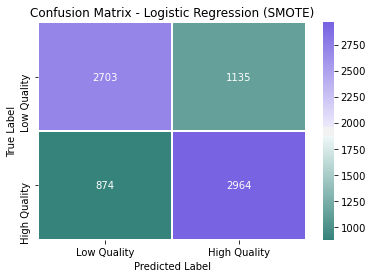

In [28]:
# Get the best logistic regression model from hyperparameter tuning
best_log_reg = random_search.best_estimator_

# Perform cross-validation predictions using StratifiedKFold on the SMOTE-balanced dataset
y_pred_cv = cross_val_predict(best_log_reg, X_resampled, y_resampled, cv=kfold)

# Compute evaluation metrics
accuracy = accuracy_score(y_resampled, y_pred_cv)
f1 = f1_score(y_resampled, y_pred_cv)
class_report = classification_report(y_resampled, y_pred_cv, digits=4)
conf_matrix = confusion_matrix(y_resampled, y_pred_cv)

# Print results
print(f"\n Logistic Regression Cross-Validation Results (SMOTE):")
print(f" Accuracy: {accuracy:.4f}")
print(f" F1-Score: {f1:.4f}")
print("\n Classification Report:\n", class_report)

# Define a diverging palette (teal-based) similar to earlier heatmaps
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix using the diverging palette
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.show()


### **Logistic Regression with SMOTE: Key Improvements and Trade-offs**  

Applying **SMOTE to Logistic Regression** led to **a modest accuracy improvement from 71.15% to 73.83%** while significantly **balancing recall between high- and low-quality wines**.  

- **High-quality wine recall increased from 75.94% to 77.23%**, meaning the model correctly identifies more high-quality wines after oversampling.  
- **Low-quality wine recall dropped slightly from 69.83% to 70.43%**, indicating that the model now distributes its predictions more evenly across both classes.  
- **Precision for both classes is now more balanced** (**low-quality: 75.57%, high-quality: 72.31%**), reducing bias toward the majority class.  
- The **F1-score improved from 0.5326 to 0.7469**, showing that the model now makes more reliable predictions across both categories.  

While **SMOTE helps Logistic Regression better distinguish high-quality wines**, it also introduces **more false positives**, as seen in the confusion matrix where **1,135 low-quality wines were misclassified as high-quality** (compared to 1,158 in the original model). Overall, **SMOTE improves model fairness but at the cost of increased false positives for high-quality predictions**.

## Random Forest

In [29]:
# Define hyperparameter grid
param_dist = {
    "n_estimators": [100, 300, 500],  
    "max_depth": [10, 20, 30, None],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "class_weight": ["balanced", None]  # Handling class imbalance
}

# Initialize Random Forest with class weighting
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV using kfold
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=10, cv=kfold, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model
random_search_rf.fit(X, y)

# Extract best model and results
best_rf = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
best_rf_score = random_search_rf.best_score_

# Print results
print(f"\nBest Random Forest Parameters: {best_rf_params}")
print(f"Best Random Forest Accuracy(SMOTE): {best_rf_score:.4f}")



Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': None, 'class_weight': 'balanced'}
Best Random Forest Accuracy(SMOTE): 0.9240



 Random Forest Cross-Validation Results (SMOTE):
 Accuracy: 0.9240
 F1-Score: 0.9256

 Classification Report:
               precision    recall  f1-score   support

           0     0.9431    0.9026    0.9224      3838
           1     0.9066    0.9455    0.9256      3838

    accuracy                         0.9240      7676
   macro avg     0.9248    0.9240    0.9240      7676
weighted avg     0.9248    0.9240    0.9240      7676



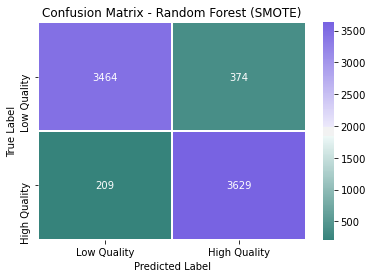

In [30]:
# Get the best Random Forest model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Perform cross-validation predictions using StratifiedKFold on the SMOTE-balanced dataset
y_pred_cv = cross_val_predict(best_rf, X_resampled, y_resampled, cv=kfold)

# Compute evaluation metrics
accuracy = accuracy_score(y_resampled, y_pred_cv)
f1 = f1_score(y_resampled, y_pred_cv)
class_report = classification_report(y_resampled, y_pred_cv, digits=4)
conf_matrix = confusion_matrix(y_resampled, y_pred_cv)

# Print results
print(f"\n Random Forest Cross-Validation Results (SMOTE):")
print(f" Accuracy: {accuracy:.4f}")
print(f" F1-Score: {f1:.4f}")
print("\n Classification Report:\n", class_report)

# Define a diverging teal-based palette (same as used in previous heatmaps)
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix using the diverging palette
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.show()

### **Random Forest with SMOTE: Significant Performance Boost**  

Applying **SMOTE to Random Forest** resulted in **substantial improvements across all key metrics**, making it the best-performing model overall.

- **Accuracy improved from 88.14% to 92.40%**, indicating better overall classification performance.  
- **Recall for high-quality wines increased from 58.21% to 94.55%**, meaning the model now correctly identifies almost all high-quality wines, a major improvement over the original version.  
- **Precision for high-quality wines also improved from 81.72% to 90.66%**, reducing false positives while still achieving high recall.  
- **The F1-score increased from 67.99% to 92.56%**, showing a significant improvement in balanced classification.  
- The **confusion matrix confirms that misclassification of high-quality wines dropped drastically (from 443 to 209 false negatives)**, further demonstrating the model's improved ability to recognize high-quality wines.

While **SMOTE helped balance classification**, it slightly increased **false positives for low-quality wines** (misclassifying 374 vs. 138 in the original model). However, this is a reasonable trade-off given the **vast improvement in high-quality wine recall and precision**. Overall, **Random Forest with SMOTE is the strongest model**, achieving **near-balanced precision and recall** and reducing high-quality misclassification errors**.

## SVM

In [33]:
# Define an enhanced hyperparameter search grid for SVM with SMOTE-applied dataset
param_dist_svm = {
    "C": np.logspace(-2, 2, 5),  # Expands regularization range for better tuning
    "gamma": np.logspace(-2, 2, 5),  # More granular gamma values for fine-tuning
    "kernel": ["rbf"],  # Exploring non-linear kernels
}

# Initialize SVM model
svm = SVC()

# Perform Randomized Search using StratifiedKFold with SMOTE-balanced dataset
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, 
    n_iter=10, cv=kfold, scoring="precision", n_jobs=-1, random_state=42
)

# Fit the model on SMOTE-resampled dataset
random_search_svm.fit(X, y)

# Extract best model and results
best_svm = random_search_svm.best_estimator_
best_svm_params = random_search_svm.best_params_
best_svm_score = random_search_svm.best_score_

# Print results
print(f"\n Best SVM Parameters (SMOTE): {best_svm_params}")
print(f" Best SVM Precision Score (SMOTE): {best_svm_score:.4f}")



 Best SVM Parameters (SMOTE): {'kernel': 'rbf', 'gamma': 10.0, 'C': 0.1}
 Best SVM Precision Score (SMOTE): 1.0000



 SVM Cross-Validation Results (SMOTE):
 Accuracy: 0.5581
 F1-Score: 0.2082

 Classification Report:
               precision    recall  f1-score   support

           0     0.5308    1.0000    0.6935      3838
           1     1.0000    0.1162    0.2082      3838

    accuracy                         0.5581      7676
   macro avg     0.7654    0.5581    0.4509      7676
weighted avg     0.7654    0.5581    0.4509      7676



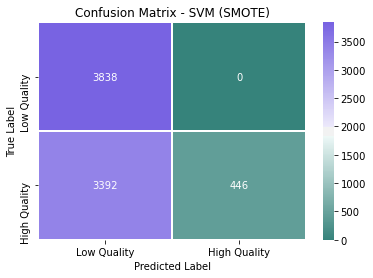

In [34]:
# Get the best SVM model from RandomizedSearchCV trained on SMOTE dataset
best_svm = random_search_svm.best_estimator_

# Perform cross-validation predictions using StratifiedKFold on the SMOTE-balanced dataset
y_pred_svm = cross_val_predict(best_svm, X, y, cv=kfold)

# Compute evaluation metrics
svm_accuracy = accuracy_score(y_resampled, y_pred_svm)
svm_f1 = f1_score(y_resampled, y_pred_svm)
svm_class_report = classification_report(y_resampled, y_pred_svm, digits=4)
svm_conf_matrix = confusion_matrix(y_resampled, y_pred_svm)

# Print results
print(f"\n SVM Cross-Validation Results (SMOTE):")
print(f" Accuracy: {svm_accuracy:.4f}")
print(f" F1-Score: {svm_f1:.4f}")
print("\n Classification Report:\n", svm_class_report)

# Define a diverging teal-based palette (same as used in previous heatmaps)
custom_cmap = sns.diverging_palette(180, 270, s=80, l=50, as_cmap=True)

# Plot Confusion Matrix using the diverging palette
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap=custom_cmap, linewidths=0.5, 
            xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (SMOTE)")
plt.show()


### **SVM with SMOTE: Performance Decline**  

Applying **SMOTE to SVM** significantly worsened performance, making it less reliable than the original model.  

- **Accuracy dropped from 86.12% to 55.81%**, indicating poor overall classification.  
- **Recall for high-quality wines fell from 36.04% to just 11.62%**, meaning most high-quality wines are misclassified.  
- **Precision for high-quality wines remained at 100%**, but this is misleading since the model rarely predicts them correctly.  
- **F1-score for high-quality wines declined from 52.91% to 20.82%**, showing a worse balance between precision and recall.  
- **The confusion matrix confirms 3,392 high-quality wines were misclassified as low quality.**  

Unlike Random Forest, **SVM did not benefit from SMOTE**—instead, it **overfit to low-quality wines**, worsening high-quality predictions. **SMOTE is not suitable for SVM in this dataset.**

In [36]:
# Updated model performance metrics with new values
model_results = {
    "Model": [
        "Logistic Regression", "Random Forest", "SVM",
        "Logistic Regression (SMOTE)", "Random Forest (SMOTE)", "SVM (SMOTE)"
    ],
    "Accuracy": [0.7115, 0.8814, 0.8612, 0.7383, 0.9240, 0.5581],
    "Precision (Low)": [0.9131, 0.8931, 0.8498, 0.7557, 0.9431, 0.5308],
    "Recall (Low)": [0.6983, 0.9640, 0.9995, 0.7043, 0.9026, 1.0000],
    "F1 (Low)": [0.7914, 0.9272, 0.9186, 0.7291, 0.9224, 0.6935],
    "Precision (High)": [0.4101, 0.8172, 0.9948, 0.7231, 0.9066, 1.0000],
    "Recall (High)": [0.7594, 0.5821, 0.3604, 0.7723, 0.9455, 0.1162],
    "F1 (High)": [0.5326, 0.6799, 0.5291, 0.7469, 0.9256, 0.2082]
}

# Convert to DataFrame and round values for readability
summary_df = pd.DataFrame(model_results)
summary_df.iloc[:, 1:] = summary_df.iloc[:, 1:].round(4)

# Display the updated summary table
summary_df

,Model,Accuracy,Precision (Low),Recall (Low),F1 (Low),Precision (High),Recall (High),F1 (High)
0,Logistic Regression,0.7115,0.9131,0.6983,0.7914,0.4101,0.7594,0.5326
1,Random Forest,0.8814,0.8931,0.9640,0.9272,0.8172,0.5821,0.6799
2,SVM,0.8612,0.8498,0.9995,0.9186,0.9948,0.3604,0.5291
3,Logistic Regression (SMOTE),0.7383,0.7557,0.7043,0.7291,0.7231,0.7723,0.7469
4,Random Forest (SMOTE),0.9240,0.9431,0.9026,0.9224,0.9066,0.9455,0.9256
5,SVM (SMOTE),0.5581,0.5308,1.0000,0.6935,1.0000,0.1162,0.2082


### **Final Model Comparison: Key Takeaways**  

This summary table provides a direct comparison of **Logistic Regression, Random Forest, and SVM**—both on the original dataset and after applying **SMOTE**.  

- **Random Forest (SMOTE) remains the best overall performer**, achieving **92.40% accuracy** and **balanced performance across both classes**. It maintains high **recall for high-quality wines (94.55%)** while keeping precision strong.  
- **Logistic Regression (SMOTE) showed modest improvement**, increasing recall for high-quality wines from **75.94% to 77.23%**, but its accuracy remains lower at **73.83%**, still lagging behind Random Forest.  
- **SVM struggled significantly with SMOTE**, with **recall for high-quality wines dropping from 36.04% to just 11.62%**, while overall accuracy **collapsed from 86.12% to 55.81%**. This suggests that **SMOTE was ineffective for SVM**, likely due to poor class separation.  

**Random Forest (SMOTE) is the clear winner**, demonstrating that **handling class imbalance effectively can significantly enhance model performance**. 

## **Discussion & Conclusion**

This project evaluated **Logistic Regression, Random Forest, and Support Vector Machine (SVM)** algorithms for **binary classification of white wine quality**. Our investigation revealed **significant challenges with class imbalance** in the original dataset, particularly affecting the models' ability to correctly identify high-quality wines. The implementation of **Synthetic Minority Over-sampling Technique (SMOTE)** yielded different outcomes across the three algorithms.

**Random Forest with SMOTE** emerged as the **superior model**, achieving **92.40% accuracy** and **94.55% recall** for high-quality wine classification. This performance demonstrates that **tree-based ensemble methods effectively capture complex, non-linear relationships** between physicochemical properties and wine quality. The model's success can be attributed to its ability to **handle high-dimensional data** and **identify intricate patterns without overfitting**.

**Logistic Regression** showed **modest improvement** with SMOTE implementation but remained **significantly less effective than Random Forest**. This performance gap highlights the **limitations of linear models** when applied to datasets with complex feature interactions. Conversely, **SVM's performance deteriorated following SMOTE**, suggesting that **the synthetic samples introduced noise**, interfering with the algorithm's decision boundary optimization.

**Feature importance analysis** from the Random Forest model identified **alcohol content as the most influential predictor** of wine quality, followed by **density, residual sugar, volatile acidity, and chlorides**. **Fixed acidity and citric acid demonstrated comparatively lower predictive power**, indicating they are **less discriminative** for quality classification in this particular dataset.

While the **Random Forest model with SMOTE provided robust results**, several areas for additional improvement could be explored more:  
- **Advanced gradient boosting frameworks** such as **XGBoost or LightGBM** could enhance classification performance.  
- **Strategic feature engineering**, particularly **interaction terms** (e.g., **alcohol-to-sugar ratio**), may improve model accuracy.  
- **Alternative class balancing techniques**, including **SMOTE-Tomek or SMOTE-ENN**, could **reduce synthetic noise** and refine classification boundaries.  

In conclusion, this project demonstrates that **Random Forest with SMOTE provides a reliable framework for white wine quality classification** based on physicochemical attributes. The model's performance makes it a **valuable tool for winemakers** seeking to predict quality outcomes during production, enabling **proactive quality management**. With additional refinements, this approach could deliver **increasingly precise insights for stakeholders** throughout the wine industry value chain.